In [1]:
import packages.WebScrapping as WBS
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

## Sacamos las opiniones de los restaurantes principales de cada ciudad

### Vitoria

In [2]:
url = "https://www.minube.com/restaurantes/espana/alava/vitoria-gasteiz"
vitoria = WBS.restaurantes_opinion(url)
vitoria.head(3)

,Contenido
0,Antes de entrar una de las cosas que más te so...
1,Antes de entrar una de las cosas que más te so...
2,Es imposible no fijarse en este glorioso edifi...


### Madrid

In [8]:
url = "https://www.minube.com/restaurantes/espana/madrid/madrid"
madrid = WBS.restaurantes_opinion(url)
madrid.head(3)

,Contenido
0,La Chocolatería San Ginés es un sitio con enca...
1,La Chocolatería San Ginés es un sitio con enca...
2,"A mí me encanta este sitio, he acabado muchas ..."


### Bilbao

In [9]:
url = "https://www.minube.com/restaurantes/espana/vizcaya/bilbao"
bilbao = WBS.restaurantes_opinion(url)
bilbao.head(3)

,Contenido
0,No hay nada como tener una buena anfitriona cu...
1,No hay nada como tener una buena anfitriona cu...
2,Llegué aquí gracias a minube. Cuando cruzas el...


### Valencia

In [10]:
url = "https://www.minube.com/restaurantes/espana/valencia/valencia"
valencia = WBS.restaurantes_opinion(url)
valencia.head(3)

,Contenido
0,Esta crepería tiene varios alicientes que la h...
1,Esta crepería tiene varios alicientes que la h...
2,La primera vez que entré en esta crêpería me p...


### Malaga

In [11]:
url = "https://www.minube.com/restaurantes/espana/malaga/malaga"
malaga = WBS.restaurantes_opinion(url)
malaga.head(3)

,Contenido
0,La bodega El Pimpi es una autñentica instituci...
1,La bodega El Pimpi es una autñentica instituci...
2,El Pimpi es una de las bodegas más típicas y f...


### Unimos para un posible analisis global

In [12]:
total = pd.DataFrame()
total = total.append(vitoria)
total = total.append(bilbao)
total = total.append(madrid)
total = total.append(malaga)
total = total.append(valencia)
total = total.dropna(axis = 'rows', how = 'any', subset = ['Contenido'])
total.sample()

/tmp/ipykernel_6062/3643049088.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(vitoria)
/tmp/ipykernel_6062/3643049088.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(bilbao)
/tmp/ipykernel_6062/3643049088.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(madrid)
/tmp/ipykernel_6062/3643049088.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(malaga)
/tmp/ipykernel_6062/3643049088.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total = total.append(va

,Contenido
1226,"Me ha sorprendido por todos los lados, su coci..."


## Una vez se ha extraido todas las opiniones, se comienza con el Analisis Exploratorio

### Limpieza de los DataFrames

In [13]:
bilbao = WBS.limpieza_total(bilbao)
madrid = WBS.limpieza_total(madrid)
vitoria = WBS.limpieza_total(vitoria)
valencia = WBS.limpieza_total(valencia)
malaga = WBS.limpieza_total(malaga)
total = WBS.limpieza_total(total)

### Grafico de barras con las palabras más frecuentes

#### Sin eliminar ninguna palabra

In [28]:
WBS.grafico_palabras_general(bilbao)
WBS.grafico_palabras_general(vitoria)
WBS.grafico_palabras_general(madrid)
WBS.grafico_palabras_general(valencia)
WBS.grafico_palabras_general(malaga)
WBS.grafico_palabras_general(total)

TypeError: 'WordListCorpusReader' object is not iterable

#### Eliminando las stopwords y palabras que no nos interesan

In [ ]:
stop_words = set(stopwords.words('spanish'))
stop_words = list(stop_words)
stop_words.extend(['none', 'excelente', 'bueno', 'maravillosas', 'estupenda', 'delicioso', 'deliciosa', 'restaurante', 'mas', 'si', 'tambien', 
'comida', 'bilbao', 'vitoria', 'madrid', 'valencia', 'malaga', 'aunque', 'comer', 'siempre', 'ademas', 'bien', 'buen', 'mejor', 'ir', 'unas', 'gran', 'asi',
'puedes', 'dos', 'bastante', 'solo', 'solas', 'puedes', 'sola', 'plato'])
WBS.grafico_palabras_general(bilbao, stop_words)
WBS.grafico_palabras_general(vitoria, stop_words)
WBS.grafico_palabras_general(madrid, stop_words)
WBS.grafico_palabras_general(valencia, stop_words)
WBS.grafico_palabras_general(malaga, stop_words)
WBS.grafico_palabras_general(total, stop_words)

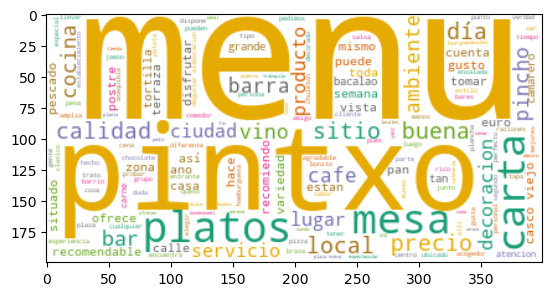

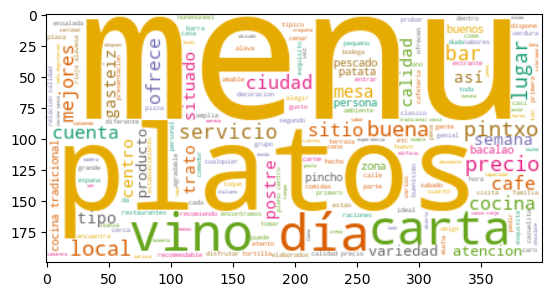

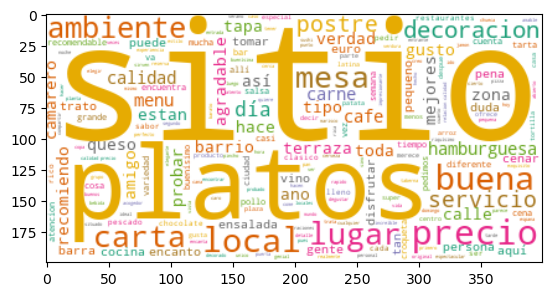

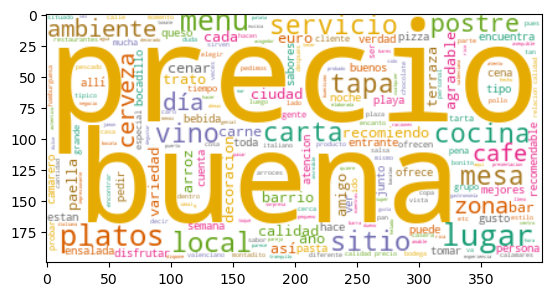

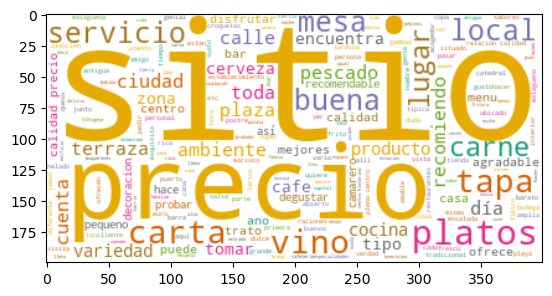

: 

: 

In [36]:
WBS.nube_de_palabras_global(bilbao, stop_words)
WBS.nube_de_palabras_global(vitoria, stop_words)
WBS.nube_de_palabras_global(madrid, stop_words)
WBS.nube_de_palabras_global(valencia, stop_words)
WBS.nube_de_palabras_global(malaga, stop_words)
WBS.nube_de_palabras_global(total, stop_words)

## Tras el analisis explortorio realizamos el NLP, para cada ciudad

### Vitoria

In [16]:
docs = len(vitoria["Contenido"])
fm = WBS.create_frequency_matrix(vitoria["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_vitoria = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Bilbao

In [17]:
docs = len(bilbao["Contenido"])
fm = WBS.create_frequency_matrix(bilbao["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_bilbao = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Madrid

In [18]:
docs = len(madrid["Contenido"])
fm = WBS.create_frequency_matrix(madrid["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_madrid = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Malaga

In [2]:
docs = len(malaga["Contenido"])
fm = WBS.create_frequency_matrix(malaga["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_malaga = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

NameError: name 'malaga' is not defined

### Valencia

In [20]:
docs = len(valencia["Contenido"])
fm = WBS.create_frequency_matrix(valencia["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_valencia = WBS.create_tf_idf_matrix(tf_matrix, idf_m)

### Todas las ciudades juntas

In [21]:
docs = len(total["Contenido"])
fm = WBS.create_frequency_matrix(total["Contenido"])
tf_matrix = WBS.create_tf_matrix(fm)
d_per_w = WBS.create_documents_per_words(fm)
idf_m = WBS.create_idf_matrix(fm, d_per_w, docs)
tf_idf_total = WBS.create_tf_idf_matrix(tf_matrix, idf_m)